In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV


In [3]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.metrics import classification_report,r2_score,accuracy_score,recall_score,\
precision_score,f1_score,confusion_matrix


In [5]:
df=pd.read_csv("mhealth_raw_data.csv")

In [6]:
df


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.64990,-4.57810,0.187760,-0.44902,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.62750,-4.31980,0.023595,-0.44902,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.50550,-4.27720,0.275720,-0.44902,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.62790,-4.31630,0.367520,-0.45686,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.70080,-4.14590,0.407290,-0.45686,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48048,2.3335,-9.3711,0.51311,-0.358070,-0.78424,0.37721,-0.24283,-0.46086,8.914500,-0.35490,0.73717,0.773710,0,subject1
48049,2.2454,-9.7574,0.49291,-0.358070,-0.78424,0.37721,-1.93540,-0.26399,8.601400,-0.35490,0.73717,0.773710,0,subject1
48050,2.0613,-9.6878,0.52581,-0.358070,-0.78424,0.37721,-2.99560,-1.44670,8.333900,-0.35490,0.73717,0.773710,0,subject1
48051,1.9553,-9.6018,0.21655,-0.354360,-0.78987,0.34971,-2.89540,-2.60290,7.713600,-0.35490,0.73717,0.773710,0,subject1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48053 entries, 0 to 48052
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alx       48053 non-null  float64
 1   aly       48053 non-null  float64
 2   alz       48053 non-null  float64
 3   glx       48053 non-null  float64
 4   gly       48053 non-null  float64
 5   glz       48053 non-null  float64
 6   arx       48053 non-null  float64
 7   ary       48053 non-null  float64
 8   arz       48053 non-null  float64
 9   grx       48053 non-null  float64
 10  gry       48053 non-null  float64
 11  grz       48053 non-null  float64
 12  Activity  48053 non-null  int64  
 13  subject   48053 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 5.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,48053.0,1.747418,2.445890,-21.73100,0.472360,1.89990,2.556500,20.00400
aly,48053.0,-8.890377,3.956058,-19.54800,-9.794200,-9.59690,-9.310800,20.89000
alz,48053.0,0.779329,4.238636,-19.26000,-0.043044,0.57491,1.096500,23.88100
glx,48053.0,-0.063697,0.427142,-0.96104,-0.410020,-0.21521,0.402600,0.86085
gly,48053.0,-0.633432,0.434531,-1.09190,-0.864920,-0.78799,-0.626640,0.74109
glz,48053.0,-0.088321,0.487885,-1.13950,-0.528490,-0.21415,0.365420,0.90177
arx,48053.0,-4.414123,3.152006,-22.14700,-6.431100,-3.87750,-2.830000,18.52100
ary,48053.0,-5.047528,5.790431,-18.77900,-9.124100,-7.35650,0.864390,17.38200
arz,48053.0,2.668434,3.028789,-16.23300,0.805820,1.82520,4.071500,24.92400
grx,48053.0,-0.383760,0.403969,-1.13330,-0.719610,-0.46667,-0.062745,1.09020


In [9]:
df.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


In [10]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Activity'>

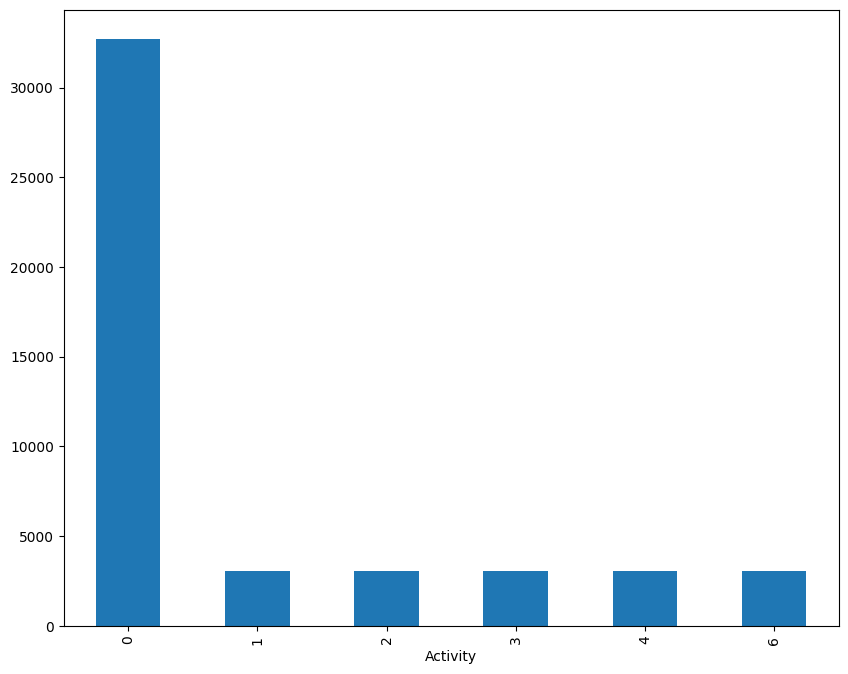

In [11]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [12]:
data_activity_0=df[df["Activity"]==0]
data_activity_else=df[df["Activity"]!=0]

In [13]:
len(df)

48053

In [14]:
activity_label={
    0:"None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

=============================Standing still (1 min)  -  a=================================


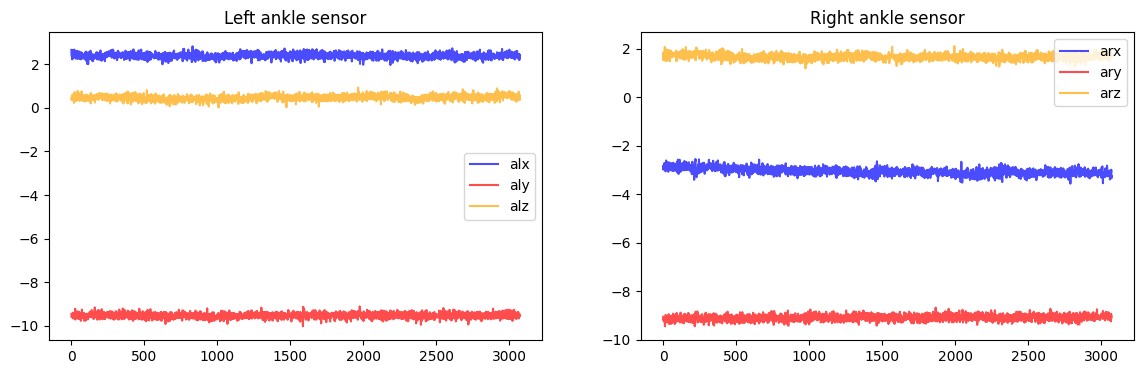

=============================Standing still (1 min)  -  g=================================


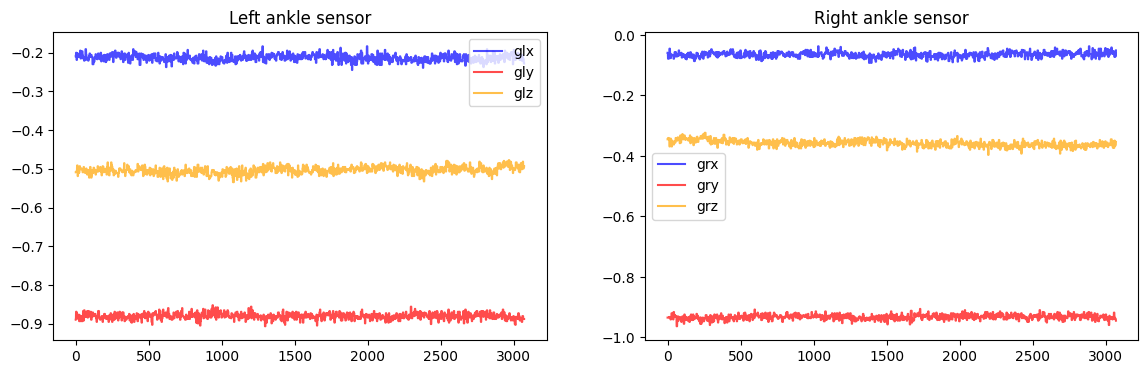

=============================Sitting and relaxing (1 min)  -  a=================================


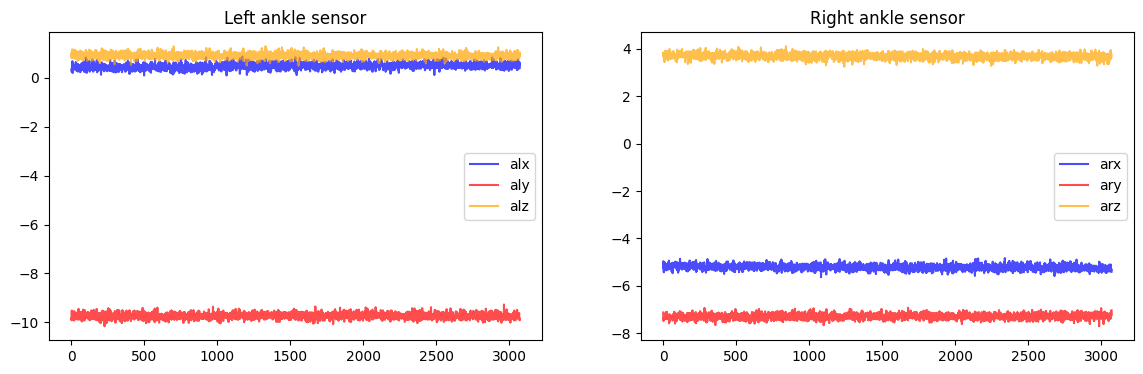

=============================Sitting and relaxing (1 min)  -  g=================================


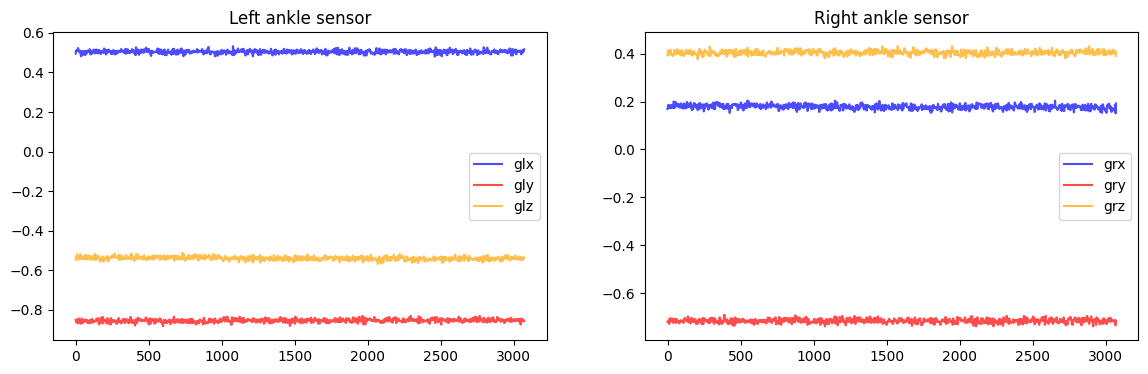

=============================Lying down (1 min)  -  a=================================


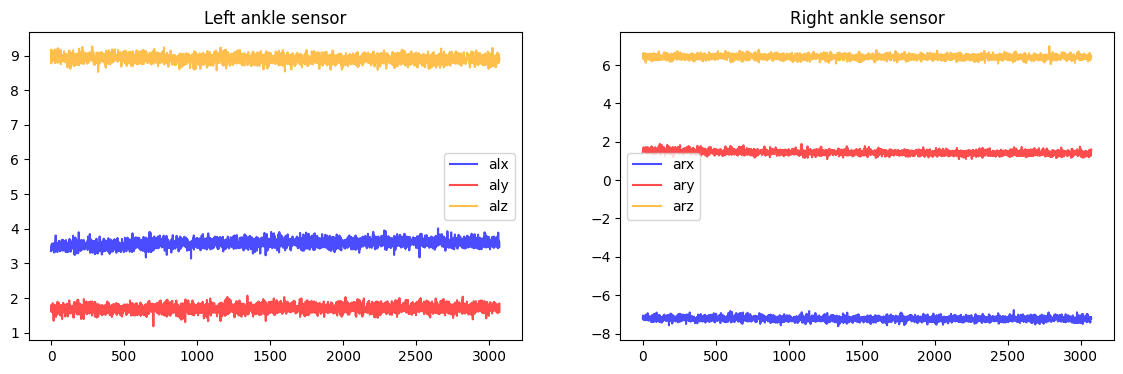

=============================Lying down (1 min)  -  g=================================


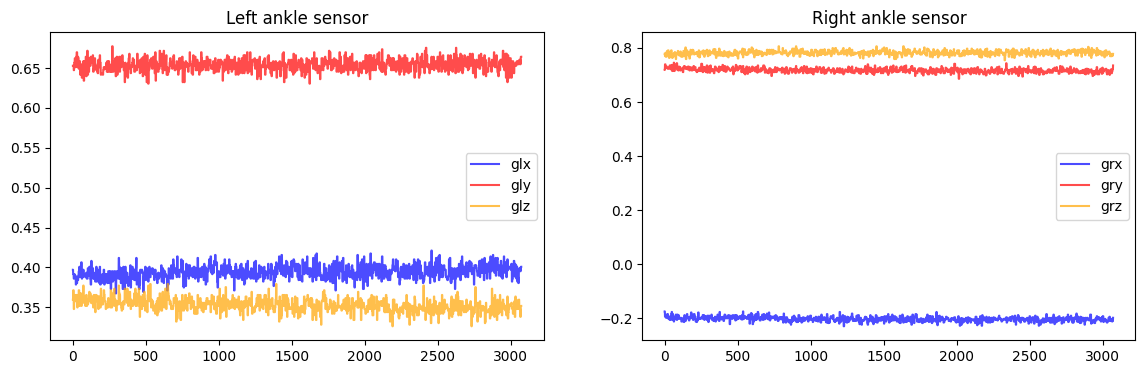

=============================Walking (1 min)  -  a=================================


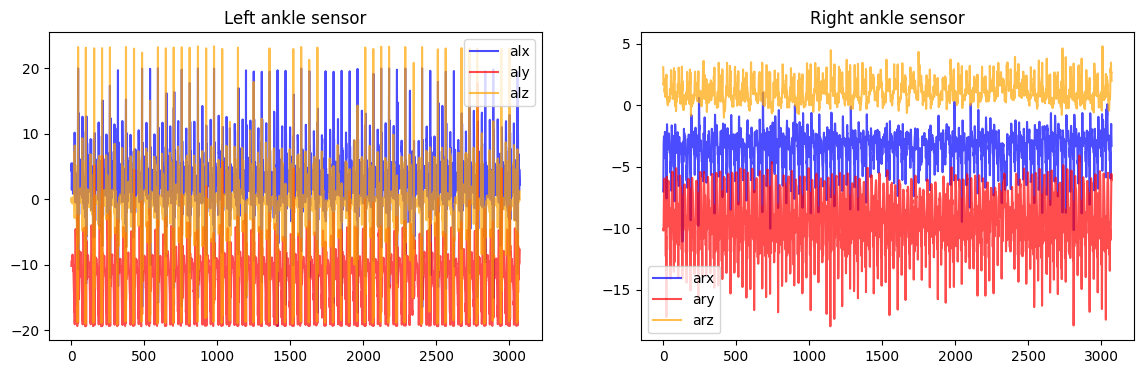

=============================Walking (1 min)  -  g=================================


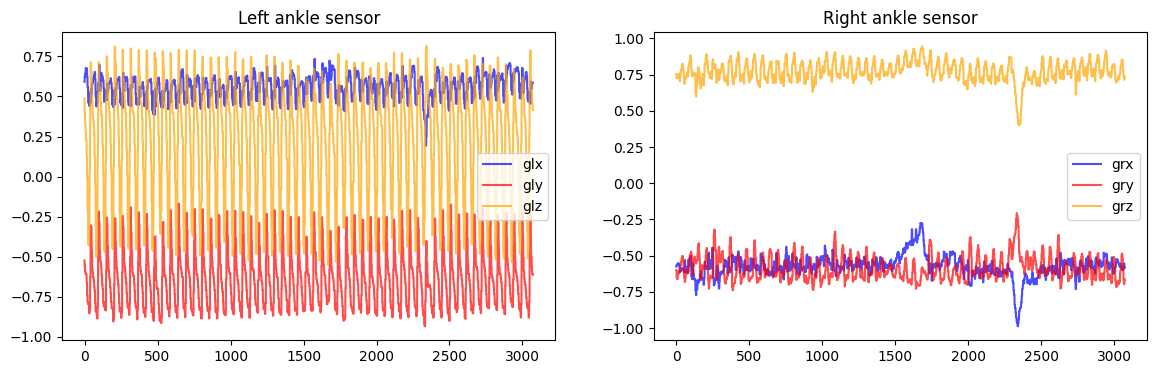

=============================Climbing stairs (1 min)  -  a=================================


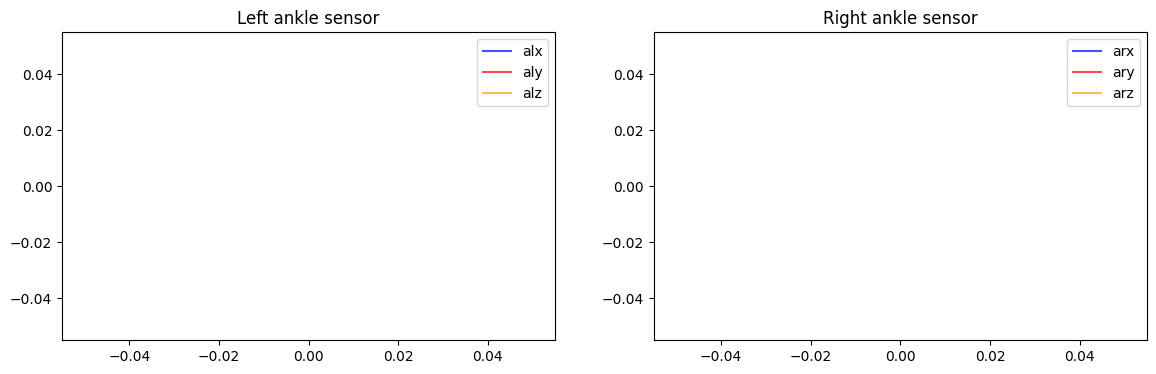

=============================Climbing stairs (1 min)  -  g=================================


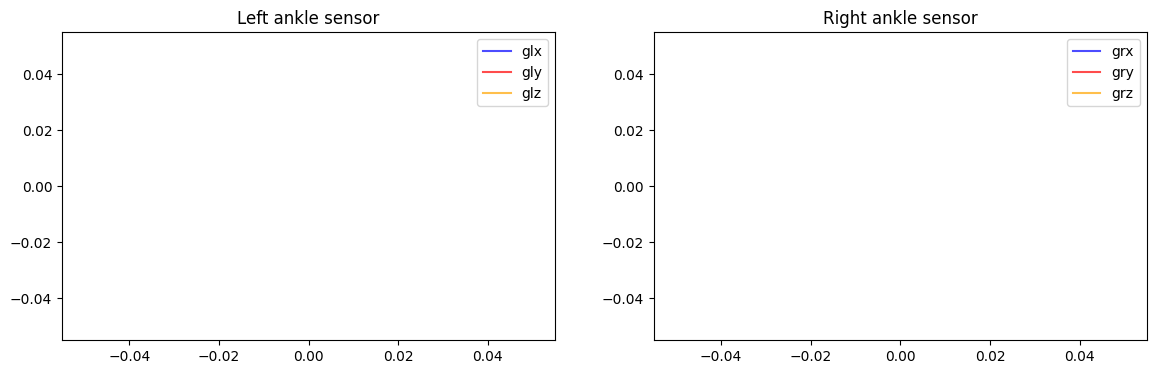

=============================Waist bends forward (20x)  -  a=================================


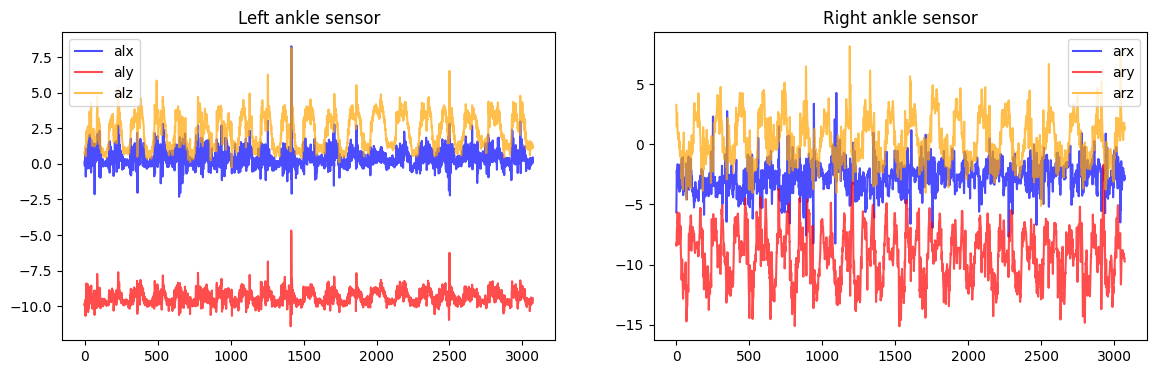

=============================Waist bends forward (20x)  -  g=================================


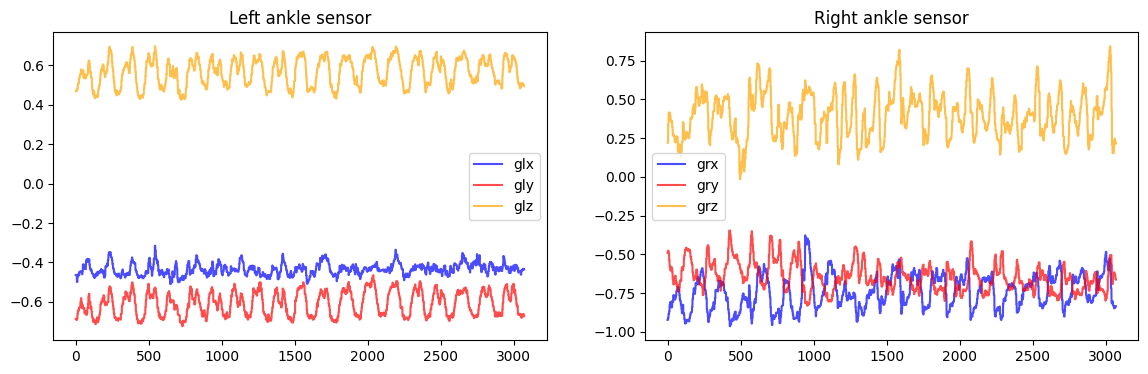

=============================Frontal elevation of arms (20x)  -  a=================================


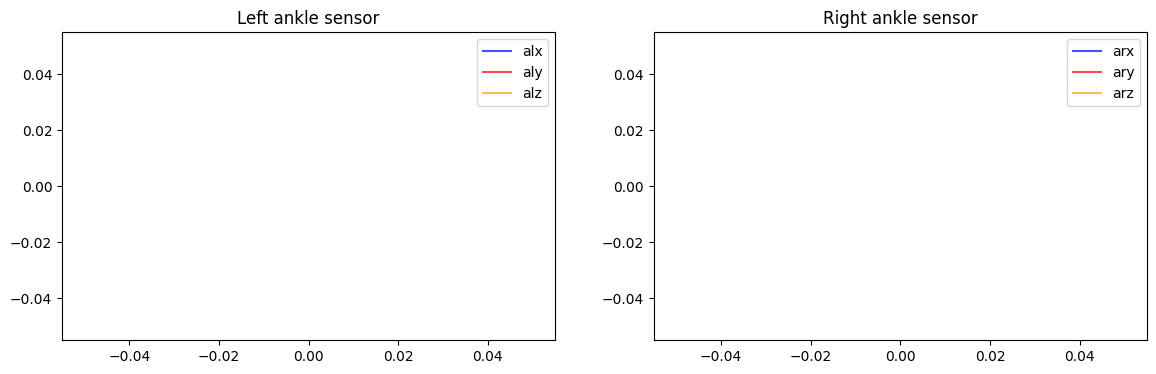

=============================Frontal elevation of arms (20x)  -  g=================================


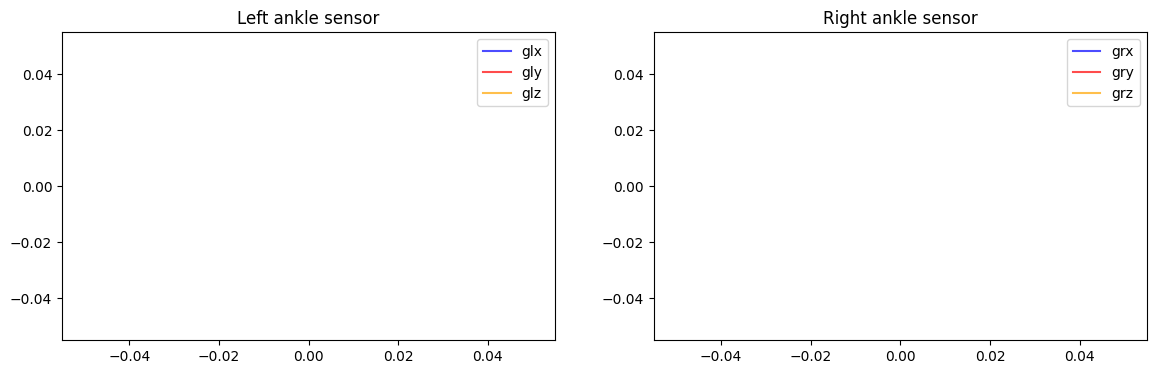

=============================Knees bending (crouching) (20x)  -  a=================================


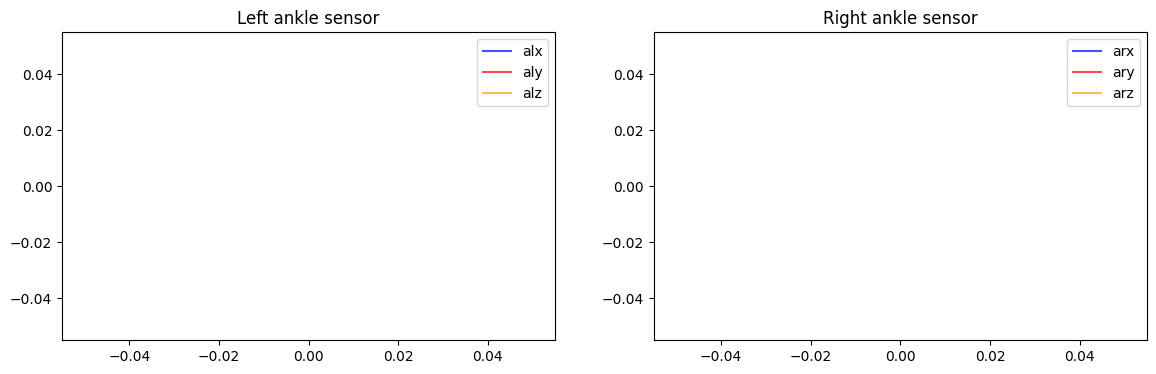

=============================Knees bending (crouching) (20x)  -  g=================================


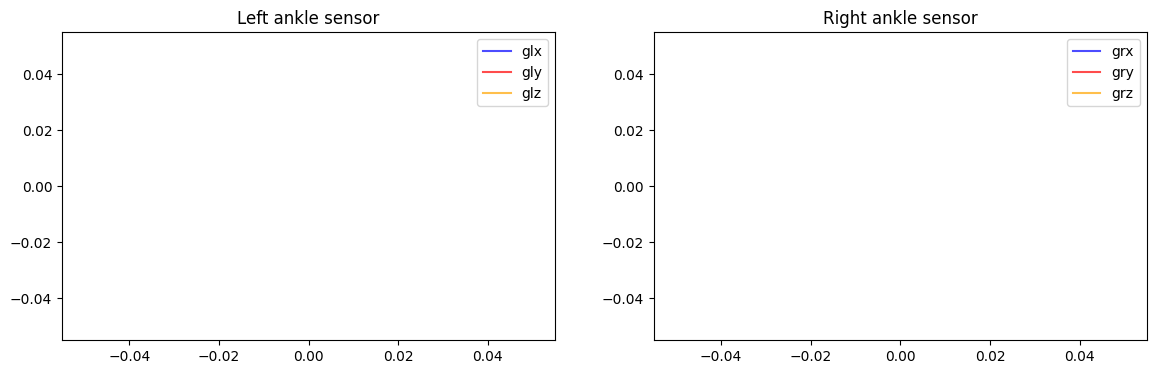

=============================Cycling (1 min)  -  a=================================


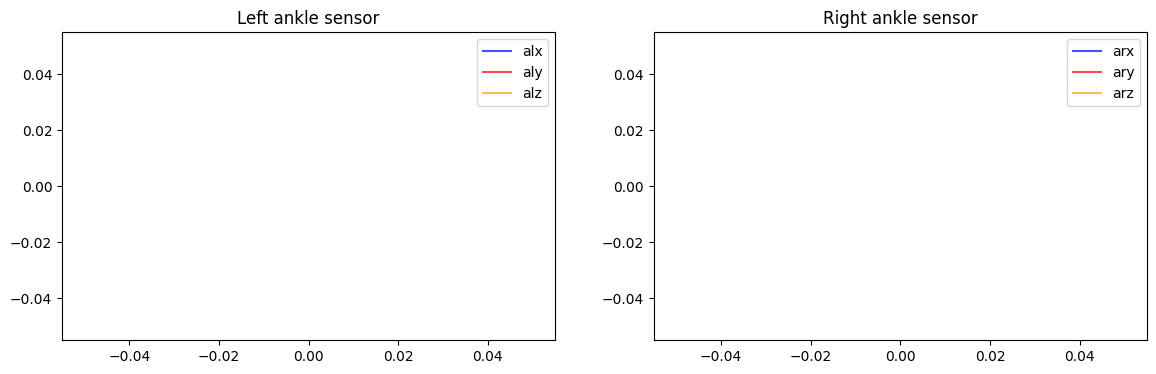

=============================Cycling (1 min)  -  g=================================


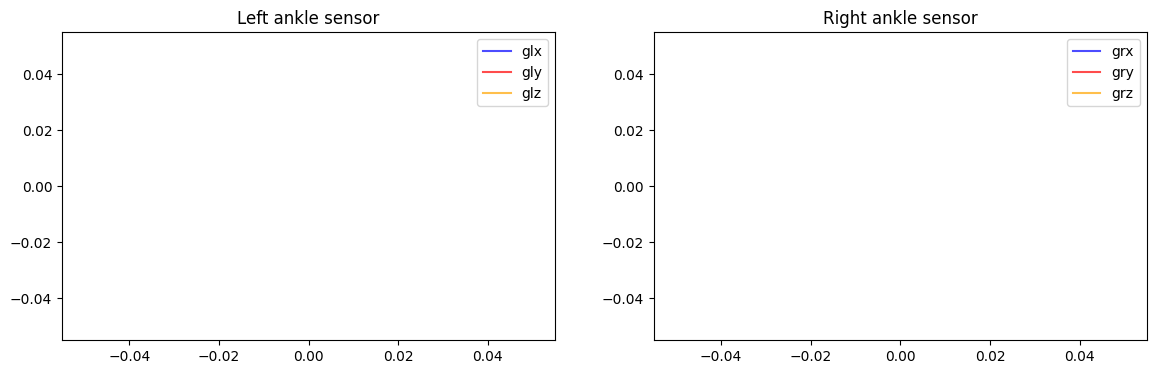

=============================Jogging (1 min)  -  a=================================


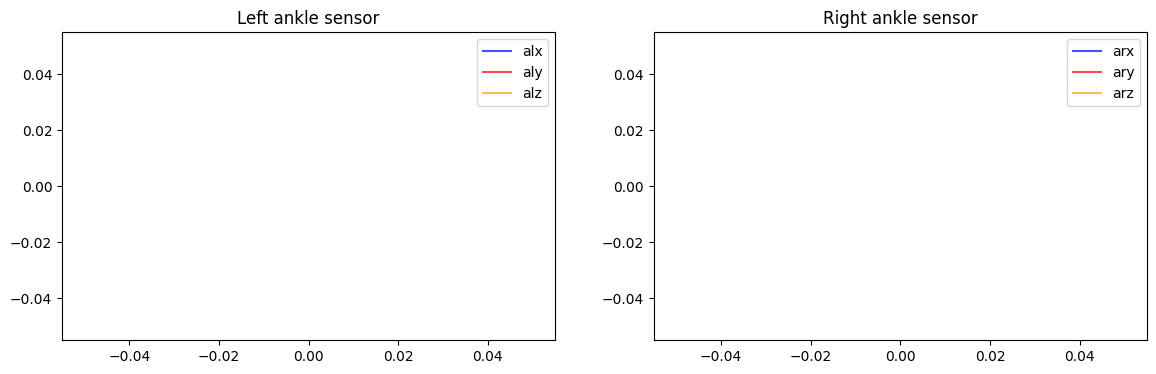

=============================Jogging (1 min)  -  g=================================


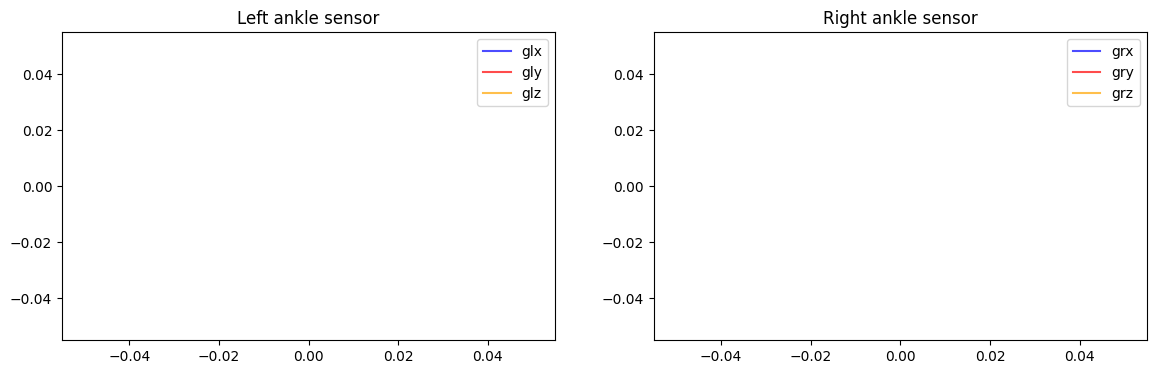

=============================Running (1 min)  -  a=================================


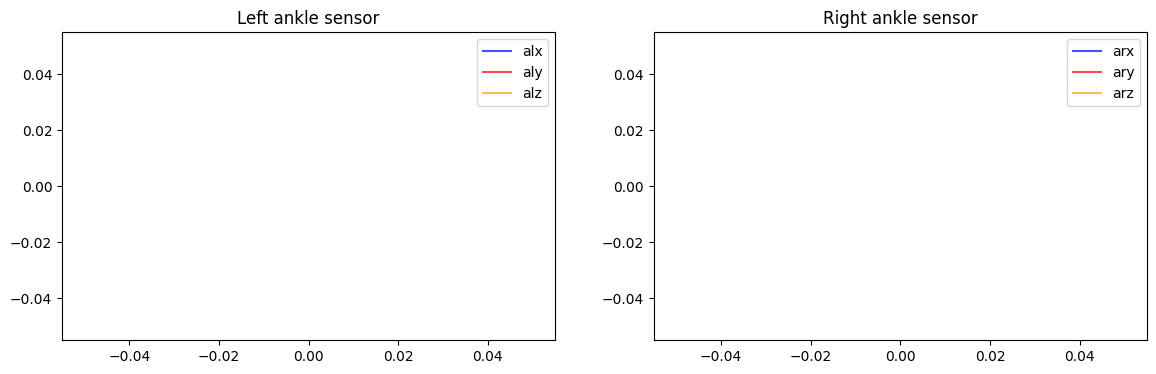

=============================Running (1 min)  -  g=================================


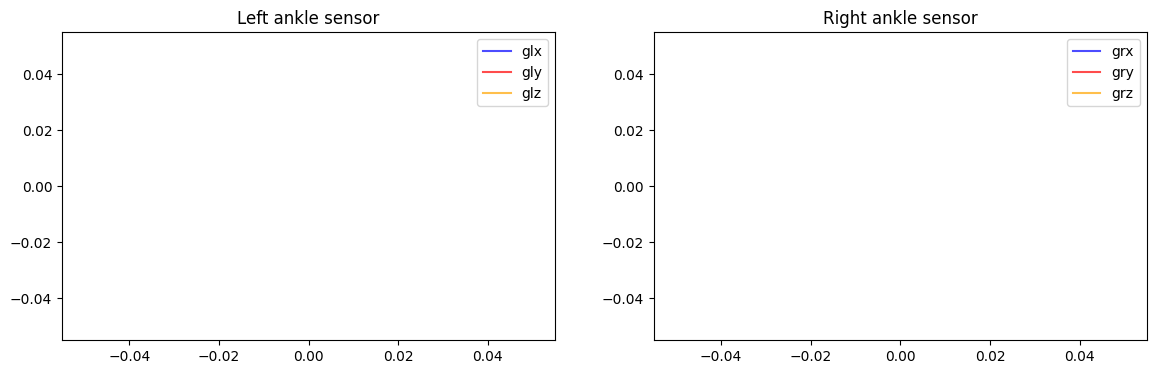

=============================Jump front & back (20x)  -  a=================================


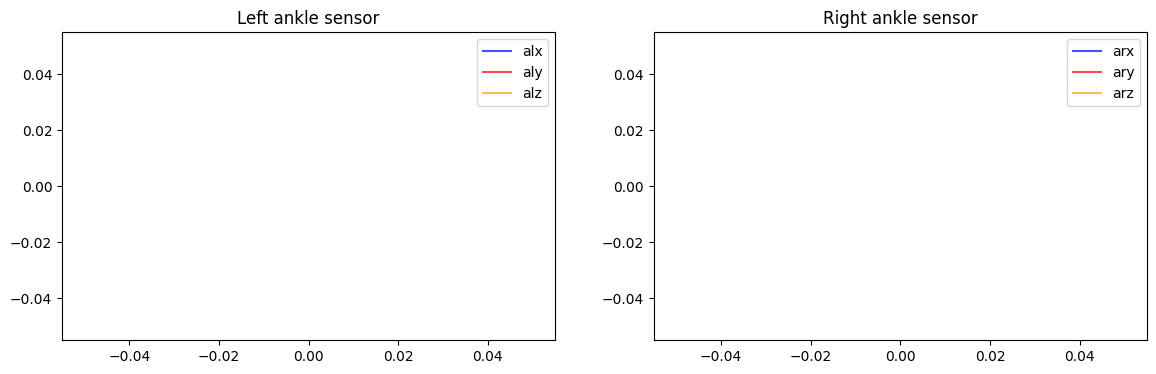

=============================Jump front & back (20x)  -  g=================================


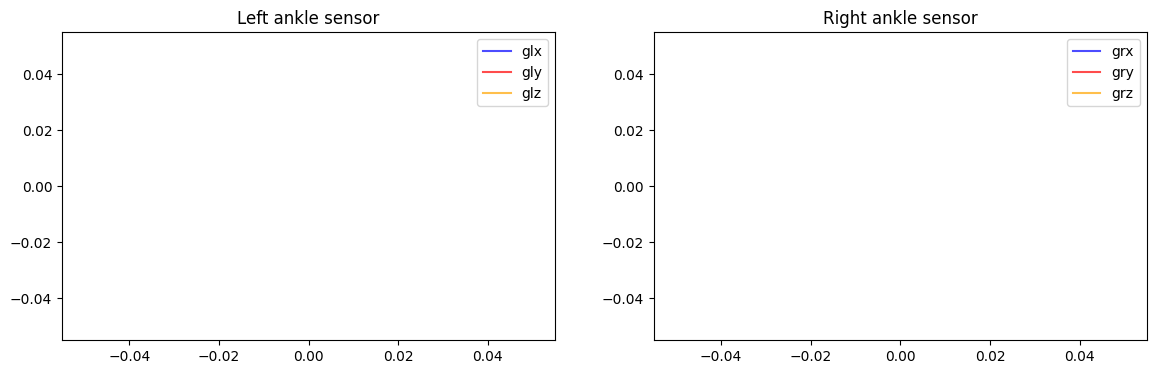

In [15]:
subject1=df[df['subject']=='subject1']
readings=['a','g']

for i in range(1,13):
  for r in readings:
    print(f"============================={activity_label[i]}  -  {r}=================================")
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lx"],
             color = 'blue', alpha=0.7, label = r+"lx")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "ly"],
             color = 'red', alpha=0.7, label = r+"ly")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "lz"],
             color = 'orange', alpha=0.7, label = r+"lz")
    plt.title("Left ankle sensor")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "rx"],
             color = 'blue', alpha=0.7, label = r+"rx")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "ry"],
             color = 'red', alpha=0.7, label = r+"ry")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r + "rz"],
             color = 'orange', alpha=0.7, label = r+"rz")
    plt.title("Right ankle sensor")
    plt.legend()
    plt.show()





In [16]:
df['Activity']=df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None',
                                                                      "Standing still (1 min)",
                                                                      "Sitting and relaxing (1 min)",
                                                                      "Lying down (1 min)",
                                                                      "Walking (1 min)",
                                                                      "Climbing stairs (1 min)",
                                                                      "Waist bends forward (20x)",
                                                                      "Frontal elevation of arms (20x)",
                                                                      "Knees bending (crouching) (20x)",
                                                                      "Cycling (1 min)",
                                                                      "Jogging (1 min)",
                                                                      "Running (1 min)",
                                                                      "Jump front & back (20x)"])

In [17]:
df["Activity"]

,Activity
0,None
1,None
2,None
3,None
4,None
...,...
48048,None
48049,None
48050,None
48051,None


In [18]:
df.Activity.value_counts()

,count
Activity,
None,32693
Standing still (1 min),3072
Sitting and relaxing (1 min),3072
Lying down (1 min),3072
Walking (1 min),3072
Waist bends forward (20x),3072


<Axes: ylabel='count'>

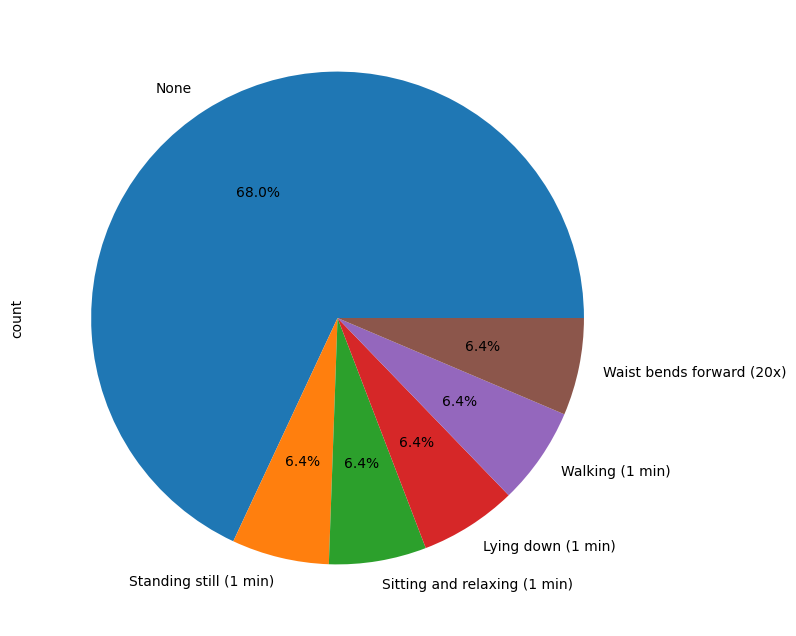

In [19]:
plt.figure(figsize=(12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= "%2.1f%%")

In [20]:
le=LabelEncoder()
df['subject'] = le.fit_transform(df['subject'])

In [21]:
df['Activity'] = le.fit_transform(df['Activity'])

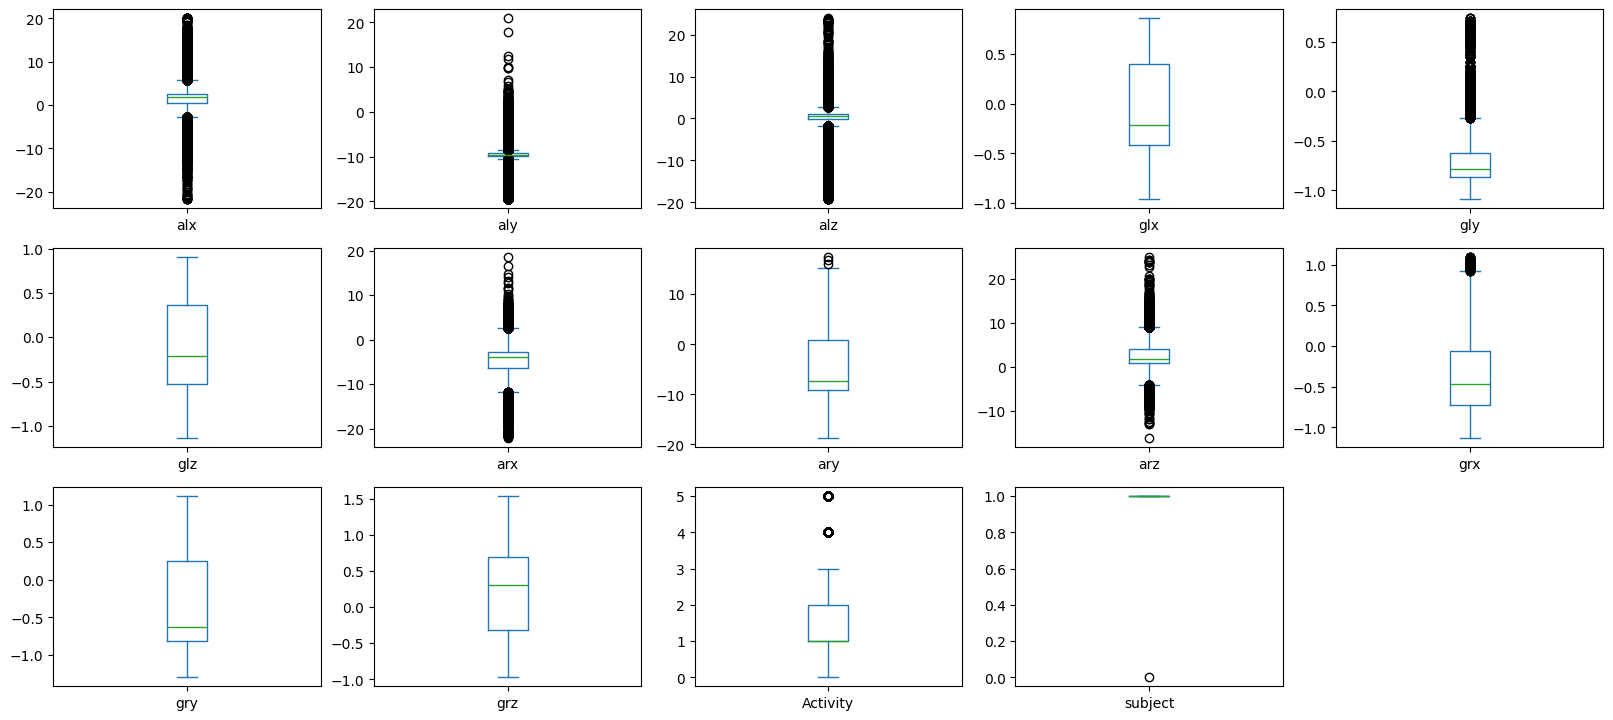

In [22]:
df.plot(kind='box', subplots=True, layout = (5,5),figsize=(20,15))
plt.show()

In [23]:
df_cleaned = df.dropna()
X=df_cleaned.drop(["Activity", "subject"], axis = 1).values
y=df_cleaned["Activity"].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

In [26]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

def resultsSummarizer(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  rec = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')
  plt.figure(figsize=(15,15))

  sns.heatmap(cm, annot = True, cmap = "Blues", xticklabels=activity_label.values(),
              yticklabels=activity_label.values())
  plt.title('confusion Matrix')
  plt.show()

  print(f'Accuracy Score: '+ '{:.4%}'.format(acc))
  print(f'Precision Score: '+ '{:.4%}'.format(prec))
  print(f'Recall Score: '+ '{:.4%}'.format(rec))
  print(f'F1 Score: '+ '{:.4%}'.format(f1))

In [27]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr.score(X_train,y_train)

0.8062376869502483

In [29]:
lr2=LogisticRegression()
lr2.fit(X_train_scaled,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr2.score(X_train_scaled,y_train)

0.8193068620105997

In [31]:
lr2.score(X_test_scaled,y_test)

0.8189612119194274

In [32]:
lr2.score(X_train_scaled,y_train)

0.8193068620105997

In [33]:
y_pred_lr=lr2.predict(X_test_scaled)

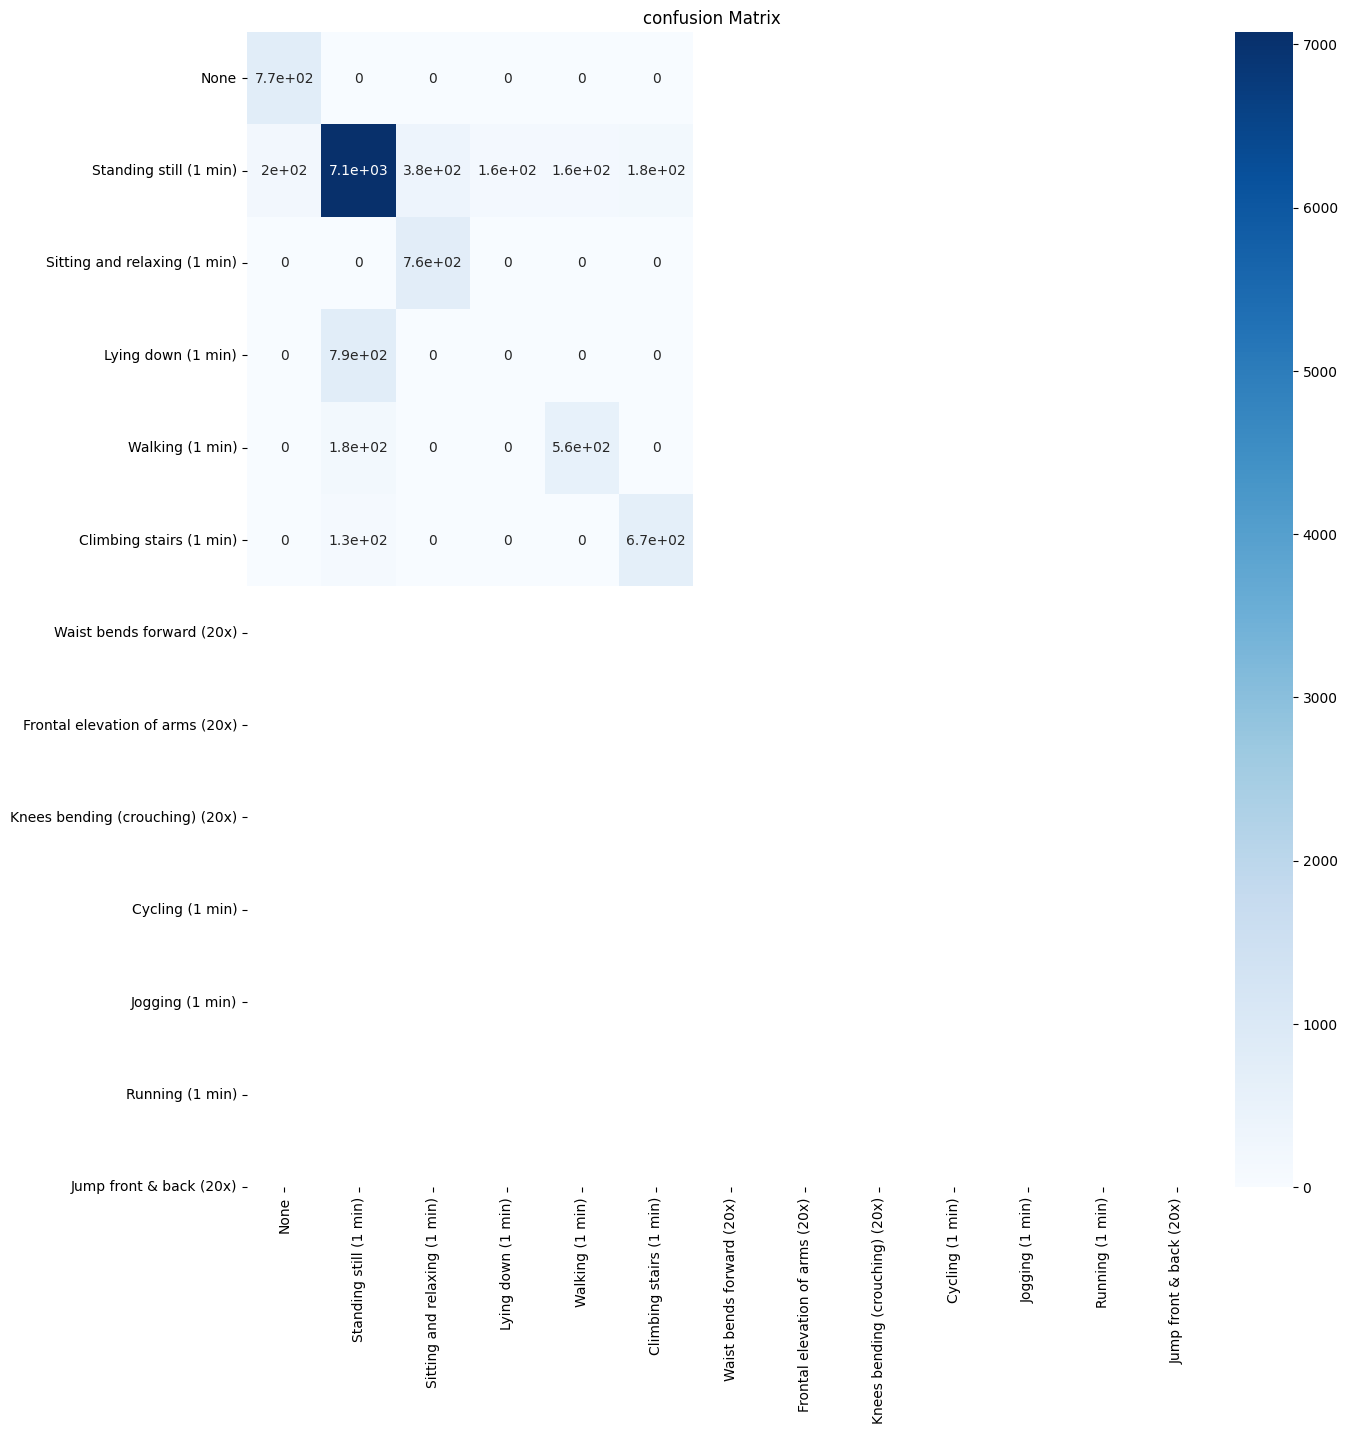

Accuracy Score: 81.8961%
Precision Score: 64.9929%
Recall Score: 74.3627%
F1 Score: 68.9221%


In [34]:
resultsSummarizer(y_test,y_pred_lr)